# Dataset exploration

We explore the data we collected on the different environmental stations we installed.

We look at the different columns we have (the sensors) and the difference we can have between the stations.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Options: 'braig', 'guillod', 'hammerli', 'johner', 'moser'
stations = ['braig',
            # 'guillod',
            'hammerli',
            'johner',
            'moser']

# Read csv
dfs = [pd.read_csv("in/data_braig.csv"),
       #  pd.read_csv("in/data_guillod.csv"),
       pd.read_csv("in/data_hammerli.csv"),
       pd.read_csv("in/data_johner.csv"),
       pd.read_csv("in/data_moser.csv")]

plt.rcParams['figure.figsize'] = [20, 10]

for df in dfs:
    # Sort data by date
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by=["date"], ignore_index=True, inplace=True)



Example of one of the dataset, each has the same columns which are values received from 3 different kind of sensors:
- **atmos14**: sensor in the air
    - temperature [°C]
    - moisture [%]
    - atmospheric pressure [hPa]
    - vapor pressure [hPa]
- **teros11**: sensor in the earth
    - volume metric water content [?] (on EVA it is water content of the soil [%], but here it is the volume)
    - temperature of the earth [°C]
- **phytos31**: sensor on the leaf
    - moisture of the leaf [%]

There also is the **date**. We regrouped the data hourly.

In [13]:
dfs[0].tail(5)

,date,phytos31_moisture,teros11_temperature,atmos14_atmosphericpressure,teros11_volumetricwatercontent,atmos14_temperature,atmos14_vaporpressure,atmos14_moisture
1126,2022-07-19 10:00:00+00:00,0.163854,25.624997,96.869085,2629.381688,33.424982,2.754243,0.540165
1127,2022-07-19 11:00:00+00:00,0.164993,26.574996,96.808328,2629.998288,35.608323,2.869329,0.495248
1128,2022-07-19 12:00:00+00:00,0.163772,28.691663,96.746662,2630.999996,37.391643,3.410663,0.536583
1129,2022-07-19 13:00:00+00:00,0.164812,28.699997,96.687496,2645.050857,37.299996,3.136747,0.491665
1130,2022-07-19 14:00:00+00:00,0.164345,28.600000,96.650000,2613.909910,37.149995,3.536500,0.515500


A lot of NaN values, mostly on the beginning when multiple tests were done on the sensors.

In [21]:
i = 0
for df in dfs:
    print("Data from station", stations[i])
    print("\tNumber of rows: ", len(df))
    print("\tTime of first entry: ", df.date.iloc[0])
    print("\tTime of last entry: ", df.date.iloc[-1])
    print("\tNumber of days:", len(df) / (24*(3600/(df.date.iloc[1]-df.date.iloc[0]).seconds)))
    print("\tNumber of NaN values:",df.isnull().sum().sum(),"\n")
    i+=1

Data from station braig
	Number of rows:  1131
	Time of first entry:  2022-06-02 12:00:00+00:00
	Time of last entry:  2022-07-19 14:00:00+00:00
	Number of days: 47.125
	Number of NaN values: 885 

Data from station hammerli
	Number of rows:  1975
	Time of first entry:  2022-04-28 08:00:00+00:00
	Time of last entry:  2022-07-19 14:00:00+00:00
	Number of days: 82.29166666666667
	Number of NaN values: 2646 

Data from station johner
	Number of rows:  1973
	Time of first entry:  2022-04-28 10:00:00+00:00
	Time of last entry:  2022-07-19 14:00:00+00:00
	Number of days: 82.20833333333333
	Number of NaN values: 7916 

Data from station moser
	Number of rows:  1973
	Time of first entry:  2022-04-28 10:00:00+00:00
	Time of last entry:  2022-07-19 14:00:00+00:00
	Number of days: 82.20833333333333
	Number of NaN values: 2270 



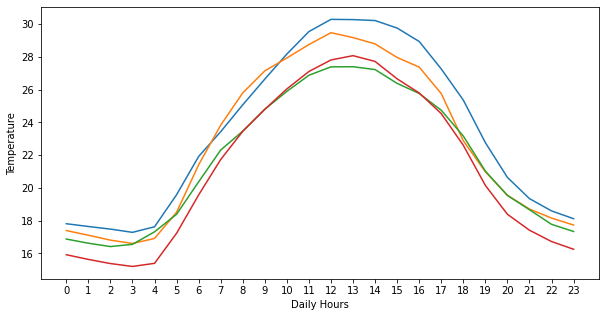

In [36]:
for df in dfs:
    time_index = pd.date_range(df.date.iloc[0], periods=len(df),  freq='1h') 
    time_index = pd.DatetimeIndex(time_index)
    df = df.set_index(time_index)
    df.groupby(df.index.hour).mean()['atmos14_temperature'].plot(figsize=(10,5),xticks=np.arange(24)).set(xlabel='Daily Hours', ylabel='Temperature')


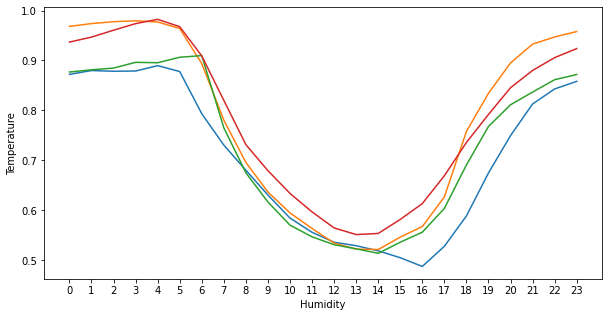

In [37]:
for df in dfs:
    time_index = pd.date_range(df.date.iloc[0], periods=len(df),  freq='1h') 
    time_index = pd.DatetimeIndex(time_index)
    df = df.set_index(time_index)
    df.groupby(df.index.hour).mean()['atmos14_moisture'].plot(figsize=(10,5),xticks=np.arange(24)).set(xlabel='Humidity', ylabel='Temperature')